# Control Tutorial_7
_Reference : The Control Handbook, Control System Fundamentals, Edited by William S.Levine from p9-90 to p9-100_,  
https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.signal.place_poles.html#scipy-signal-place-poles

# State-Space-Pole Placement
---

We present a design method commonly called the pole placement technique.  
We assume that all state variables are measurable and are available for feedback.  
It will be shown that if the system considered is completely state controllable, then poles of the closed-loop system may be placed at any desired locations by means state feedback through an appropriate state feedback gain matrix.

## State Feedback Control
<img src="figures/StateFeedback.png" hight="120">
Consider a control system

$$
\dot{x}=Ax+Bu \tag{1}
$$

Where $x$ is state vector ($n$-vector); $u$ is control signal (scalar); $A$ is $n \times n$ constant matrix; $B$ is $n\times 1$ constant matrix.  
We shall choose the control signal to be 

$$
u=-Kx \tag{2}
$$

This means the control signal is determined by instantaneous state. Such a scheme is called _**state feedback**_.  
The $1\times n$ matrix $K$ is called the state feedback gain matrix.

Substituting Equation(2) into Equation(1) gives

$$
\dot{x}(t) = (A-BK)x(t) \tag{3}
$$

The solution of Equation(3) is given by

$$
x(t) = e^{(A-BK)t}x(0)
$$

Note the eigenvalues of matrix $A-BK$ are the desired closed loop poles.  
We now prove that a necessary and sufficient condition for arbitary pole placement is that the system be completely state controllable. 

## Design Steps for Pole Placement (Manually)

- Step1
Check the controllability condition for the system. If the system is completely state controllable, the use the following steps.

- Step2
From the characteristic polynomial for matrix $A$:
$$
|SI-A|=s^n+a_1s^{n-1}+\cdots+a_{n-1}s+a_n
$$
determine the value of $a_1,a_2,\cdots,a_n$.

- Step3
Determine the transformation matrix $T$ that transforms the system state equation into controllable canonical form.  
(If the given system is already in the controllable canonical form, then $T=I$.)  
The transformation matrix $T$ is given by
$$
T=MW
$$
Where 
$$
M = \begin{bmatrix}B|AB|\cdots|A^{n-1}B\end{bmatrix}\\
W=\begin{bmatrix}a_{n-1}& a_{n-2}& \cdots&a_1& 1\\ a_{n-2}& a_{n-3}& \cdots& 1 & 0\\ \vdots& \vdots& & \vdots &\vdots\\ a_1& 1& \cdots&0& 0\\1&0&0&0&0 \end{bmatrix}
$$

- Step4
Using desired eigenvalues (desired closed-loop poles), write the desired characteristic polynominal
$$
(s-\mu_1)(s-\mu_2)\cdots(s-\mu_n)=s^n + \alpha_1s^{n-1} + \cdots + \alpha_{n-1}s + \alpha_n
$$
and determine the values of $\alpha_1,\alpha_2,\cdots,\alpha_n$

- Step 5
The required state feedback gain matrix $K$ can be determined.
$$
K=\begin{bmatrix}\alpha_n-a_n|\alpha_{n-1}-a_{n-1}|\cdots|\alpha_1-a_1\end{bmatrix}T^{-1}
$$

# Simulation

In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Example (Mass-Spring-Damper system)
<img src="figures/StateMSD.png" hight="150">

The force equation becomes:

$$
m\frac{d^2x}{dt^2} + c\frac{dx}{dt} + kx = u
$$

The state matrix is given like:
$$
x = \begin{bmatrix}x\\\frac{dx}{dt}\end{bmatrix}=\begin{bmatrix}x_1\\x_2\end{bmatrix}
$$

Therefore the state equation may be written as
$$
\dot{x} = \frac{d}{dt}\begin{bmatrix}x_1\\ x_2\end{bmatrix} = \begin{bmatrix}0&1\\-\frac{k}{m}&-\frac{c}{m}\end{bmatrix}\begin{bmatrix}x_1\\ x_2\end{bmatrix} + \begin{bmatrix}0\\ \frac{1}{m}\end{bmatrix}u
$$

Where,
$$
A = \begin{bmatrix}0&1\\-\frac{k}{m}&-\frac{c}{m}\end{bmatrix}\\
B = \begin{bmatrix}0\\ \frac{1}{m}\end{bmatrix}
$$

The typical parameters of Mass-Spring-Damper system setup are selected as following:   
Mass of the cart:  $m  = 1$ [kg]   
The spring constant: $k = 1$ [N/m]   
The damping constant: $c = 1$ [N/(m/s)] 

Then, the state equation gives
$$
\dot{x} = \frac{d}{dt}\begin{bmatrix}x_1\\ x_2\end{bmatrix} = \begin{bmatrix}0&1\\-1&-1\end{bmatrix}\begin{bmatrix}x_1\\ x_2\end{bmatrix} + \begin{bmatrix}0\\ 1\end{bmatrix}u\\
A = \begin{bmatrix}0&1\\-1&-1\end{bmatrix}\\
B = \begin{bmatrix}0\\ 1\end{bmatrix}
$$

In [2]:
def MSD_state(m=1,k=1,c=1):
    A = np.array([[    0,     1],
                  [ -k/m,  -c/m]])
    B = np.array([[   0],
                  [-1/m]])
    return A,B

By using the state feedback control $u=-Kx$, it is desired to have the closed-loop poles at $s=-\frac{-2-j}{3},\frac{-2+j}{3}$.  

In [3]:
# desired the closed-loop poles
P = np.array([-2-1j, -2+1j]) / 3.

Determine the state feedback gain matrix $K$.  
`scipy.signal.place_poles` method computes $K$ such that eigenvalues of $(A - BK)$

In [4]:
A,B = MSD_state()
fsf = signal.place_poles(A, B, P)

In [5]:
K = fsf.gain_matrix
K

array([[ 0.44444444, -0.33333333]])

In [6]:
fsf.computed_poles

array([-0.66666667-0.33333333j, -0.66666667+0.33333333j])

In [7]:
fsf.requested_poles

array([-0.66666667-0.33333333j, -0.66666667+0.33333333j])

We can plot the desired and computed poles in the complex plane:

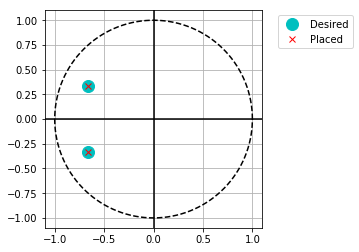

In [8]:
t = np.linspace(0, 2*np.pi, 401)
plt.plot(np.cos(t), np.sin(t), 'k--')  # unit circle
plt.plot(fsf.requested_poles.real, fsf.requested_poles.imag,'co',markersize=12, label='Desired')
plt.plot(fsf.computed_poles.real, fsf.computed_poles.imag, 'rx',label='Placed')
plt.grid(True)
plt.axis('image')
plt.axis([-1.1, 1.1, -1.1, 1.1])
plt.axhline(y=0,color="k")
plt.axvline(x=0,color="k")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, numpoints=1)